In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from scipy.stats import pearsonr

all_data = pd.read_csv('all_data_copy.csv')
df = all_data



<h1>Is there a Relationship between GDP and Life Expectancy?</h1>

This analysis has the goal and intention of analyzing (as you would expect), if there is a correlation between GDP and Life Expectancy.
To perform this analysis, a dataset will be used which contains data on 6 different countries, namely; Zimbabwe, Chile, China, United States, Mexico, and Germany.

To have a basic understanding of what this dataset looks like, here is a preview:

In [3]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


The variables here are:
- Country: One of the 6 Countries mentioned above
- Year: Each Row has data from 2000 - 2015 from each country, yearly
- LE: Which was abreviated from Life Expectancy, at each given year, from each given country
- GDP: GDP of given country at given year
- GDP (Billions): GDP abreviated in Billions

The first step in making this program was to import all the necessary libraries, which in this case were:

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from scipy.stats import pearsonr

Following that, extracting the data into a variable pandas format was necessary, as well as making the necessary conversions to variable values and column names:

In [5]:
all_data = pd.read_csv('all_data_copy.csv')
all_data['GDP (Billions)'] = round(all_data.GDP/1000000000,1)
df = all_data
df.rename(columns = {"Life expectancy at birth (years)":"LE"},inplace=True)

The next step was then to consider what our analysises would be. The main goal as stated was clear, is there a relationship between GDP and Life Expectancy. From that, our analysis would be:
- How is the overall GDP and Life Expectancy data presented, are there outliers? If so which ones?
- On average for all countries, what is the relationship between Life Expectancy and GDP over the years? (Plotted on a Side-by-Side Bar Graph)
- By separating each Country individualy, and plotting GDP vs Life Expectancy over time, is there a strong relationship? (One Double-Lined Chart for each Country)
- Does By having the highest GDP mean having the highest Life Expectancy? (Scatter Plot All Countries (GDP vs Life Expectancy))

Perfect, now we are on track to begin our adventure! As stated, the first part of this analysis was to see if there is anything nefarious about our datasets composition.

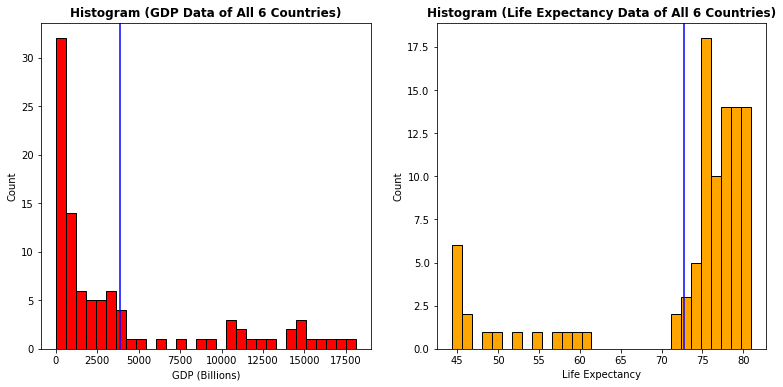

In [6]:
def Check_Values_Histogram():
    gdp_avg,le_avg = df['GDP (Billions)'].mean(),df['LE'].mean()
    plt.figure(figsize=(13,6))
    ax = plt.subplot(1,2,1)
    plt.hist(df['GDP (Billions)'],bins=30,color='red',edgecolor='black',linewidth=1)
    plt.title('Histogram (GDP Data of All 6 Countries)',weight='bold')
    plt.axvline(gdp_avg,color='b')
    plt.xlabel('GDP (Billions)')
    plt.ylabel('Count')
    ax = plt.subplot(1,2,2)
    plt.hist(df["LE"],bins=30,color='orange',edgecolor='black',linewidth=1)
    plt.title('Histogram (Life Expectancy Data of All 6 Countries)',weight='bold')
    plt.axvline(le_avg,color='b')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Count')
    plt.show()
    plt.close()
Check_Values_Histogram()

(Blue Line Represents the Mean Given all the Data in each)(Count stands for number of values that fall between each histogram range (0 - 500, 500 - 1000))

Aha! Well thats interesting... It appears that our GDP data is heavily rightly skewed, and quite opponsingly, our Life Expectancy data is very much leftly skewed. What this indicates is that:
- For GDP: Most of our countries and therefore data, have a GDP that falls between 0.1 billion and around 5 trillion. Some Country or Countries however, seem to have a much higher GDP than the rest. This means, some country could make our calculations of mean for instance, not being accurately representing the whole data. It could also make some graphs more complicated to demonstrate as their plots would be far more distant than the rest.
- For Life Expectancy: Most of our countries tend to have a Life Expectancy of between 70 and 80, however one country seems to have far lower Life Expectancies, which could have the same issues as the GDP data.

The next step is to figure out which countries these are to look out for them later! Heres how we do it:

In [7]:
def Check_Value_Mean():
    First_Row = list(df.Country.unique())
    First_Row.insert(0,'Countries:')
    Second_Row = ['GDP (Billions) Average:']
    Third_Row = ['Life Expectancy Average:']
    avg_corr = 0
    for c in df.Country.unique():
        avg_le,avg_gdp = round((df['LE'][df.Country == c]).mean(),1),round((df['GDP (Billions)'][df.Country == c]).mean(),1)
        Second_Row.append(str(avg_gdp))
        Third_Row.append(str(avg_le))
    Data = [First_Row,Second_Row,Third_Row]
    print(tabulate(Data, headers='firstrow',tablefmt='fancy_grid'))
Check_Value_Mean()

╒══════════════════════════╤═════════╤═════════╤═══════════╤══════════╤════════════════════════════╤════════════╕
│ Countries:               │   Chile │   China │   Germany │   Mexico │   United States of America │   Zimbabwe │
╞══════════════════════════╪═════════╪═════════╪═══════════╪══════════╪════════════════════════════╪════════════╡
│ GDP (Billions) Average:  │   169.8 │  4957.7 │    3094.8 │    976.7 │                    14075   │        9.1 │
├──────────────────────────┼─────────┼─────────┼───────────┼──────────┼────────────────────────────┼────────────┤
│ Life Expectancy Average: │    78.9 │    74.3 │      79.7 │     75.7 │                       78.1 │       50.1 │
╘══════════════════════════╧═════════╧═════════╧═══════════╧══════════╧════════════════════════════╧════════════╛


Aha x2! By measuring the mean GDP and Life Expectancy of each country in all years, we can tell that the US has an astronomically higher GDP then the rest of the countries, almost 1 trillion more on average! 

What is more, Zimbabwe not only has a considerably lower GDP then the rest, but its Life Expectancy is clearly what was so leftly skewed on the histogram. 

Cheeky bonus spotting: China whilst having the highest GDPs on average, has the second lowest Life Expectancy Average!

Now that we know these three culprits, we can watch out for them following our Analysis!

Onto analyzing, here is where we can first see if there is any inkling of relationship between these two variables. I present to you, the "Yearly Average GDP vs Life Expectancy Side-By-Side Bar Graph" (title in progress)

C:\Users\pippo_4wep9xe\AppData\Local\Temp\ipykernel_19944\59566154.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(range(70,76,1))


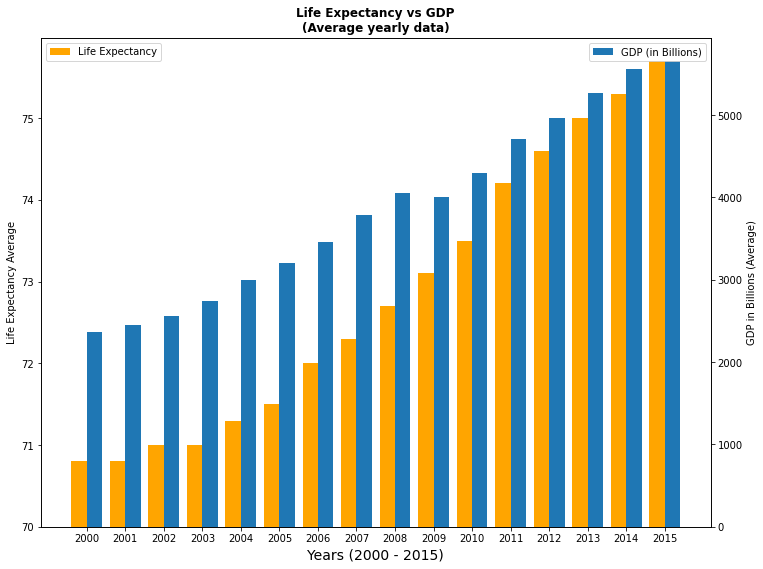

In [8]:
def Bar_All_Countries_Average():
    global avg_le,avg_le_x
    Countries = list(df.Country.unique())
    Years = list(df.Year.unique())
    avg_le = []
    avg_gdp = []
    for yr in df.Year.unique():
        avg_le.append(round((df['LE'][df.Year == yr]).mean(),1))
        avg_gdp.append(round((df['GDP (Billions)'][df.Year == yr]).mean(),1))
    plt.figure(figsize=(12,9))
    # t,w,n,d t = number of datasets, w = width of each bar, 
    # d= number of bars, n = which current bar 
    # ([t*element + w*n for element in range(d)])
    t,w,n,d = 2,0.8,1,len(avg_le)
    avg_le_x = [t*element + w*n for element in range(d)]
    t,w,n,d = 2,0.8,2,len(avg_gdp)
    avg_gdp_x = [t*element + w*n for element in range(d)]
    ax1 = plt.subplot()
    avg_le = [i % 10 for i in avg_le]
    ax1.bar(avg_le_x,avg_le,color='orange')
    ax2 = ax1.twinx()
    ax2.bar(avg_gdp_x,avg_gdp)
    plt.title('Life Expectancy vs GDP\n(Average yearly data)',weight='bold')
    ax1.set_ylabel('Life Expectancy Average')
    ax2.set_ylabel('GDP in Billions (Average)')
    middle_x = [(a+b)/2 for a,b in zip(avg_le_x,avg_gdp_x)]
    ax1.set_yticklabels(range(70,76,1))
    plt.xticks(middle_x)
    ax1.set_xticklabels(Years)
    ax1.set_xlabel('Years (2000 - 2015)',fontsize=14)
    ax1.legend(['Life Expectancy'],loc='upper left')
    ax2.legend(['GDP (in Billions)'],loc='upper right')
    plt.show()
    plt.close()
Bar_All_Countries_Average()

Well,well,well... It appears that according to this chart, on average, there has been a steady increase in GDP across these 6 countries, and an equal increase in Life Expectancy. Notice, here Life Expectancy starts at 70 and goes up to 80, which was the max on the dataset. This was done not with the intention to be malicious or manipulating data, but because, before the charts all seemed to almost not move because 70 compared to 71 doesnt seem like a lot in chart terms, but 0 to 1 does, therefore the change of y axis was made to visualize in a more presentable way.

Now I know what youre thinking; "But is this the same with all Countries?","Why is Life Expectancy seem to be getting faster?","Why are you so handsome?". I hear you and trust me, I understand your worries. That is precisely what led me to try and, lets say, diversify the data more, to get a more clear view.

This leads us into our next analysis of seeing if this holds true with every individual Country in our dataset:

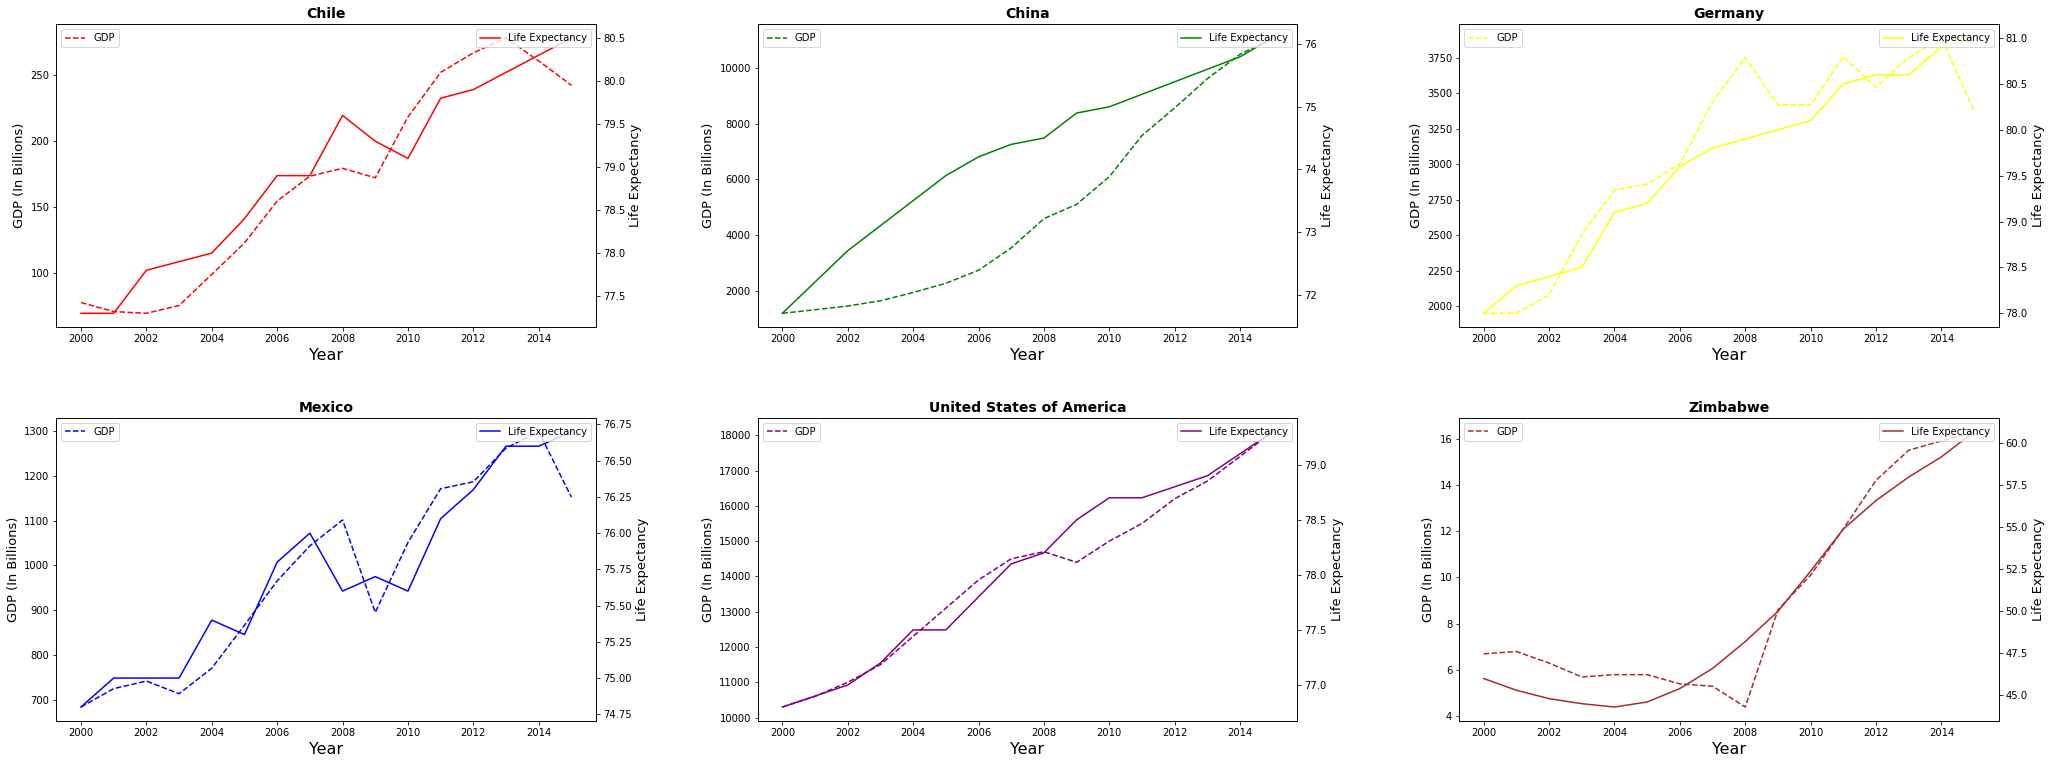

In [9]:
def Sep_Line_All_Countries():
    Countries = list(df.Country.unique())
    Years = list(df.Year.unique())
    Colors = ['red','green','yellow','blue','purple','brown']
    count = 0
    plt.figure(figsize=(13,9))
    for c in Countries:
        ax1 = plt.subplot(2,3,count+1)
        ax1.plot(Years,df['GDP (Billions)'][df.Country == c],color=Colors[count],linestyle='--',label='GDP')
        ax2 = ax1.twinx()
        ax2.plot(Years,df['LE'][df.Country == c],color=Colors[count],label='Life Expectancy')
        plt.title(c,weight='bold',fontsize=14)
        ax1.set_xlabel('Year',fontsize=16)
        ax1.set_ylabel('GDP (In Billions)',fontsize=13)
        ax2.set_ylabel('Life Expectancy',fontsize=13)
        plt.subplots_adjust(right = 2.2,top=1.2,wspace=0.3,hspace=0.3)
        
        ax1.legend(loc='upper left')
        ax2.legend(loc='upper right')
        count+=1
    #plt.savefig('Line_Chart_Sep_Countries_LE_GDP.png') 
    plt.show()
    plt.close()
Sep_Line_All_Countries()

Would you look at that. It would appear that in, what seems like every case, there is a direct, strong, positive relationship between GDP growth over time and Life Expectancy. It is especially fascinating to see in Mexico how, not only is there clearly a strong positive relationship, but so strong, that every dip in GDP has an almost identical dip in Life Expectancy.

So clearly, there is a very strong correlation between the two variables, in all accounts. The next important question to ask is, does this mean that the greater the GDP, the greater the life expectancy? Or in other words, If Chile had a 10x higher GDP, would that reflect on them having a 10X higher increase in Life Expectancy?

On we go;

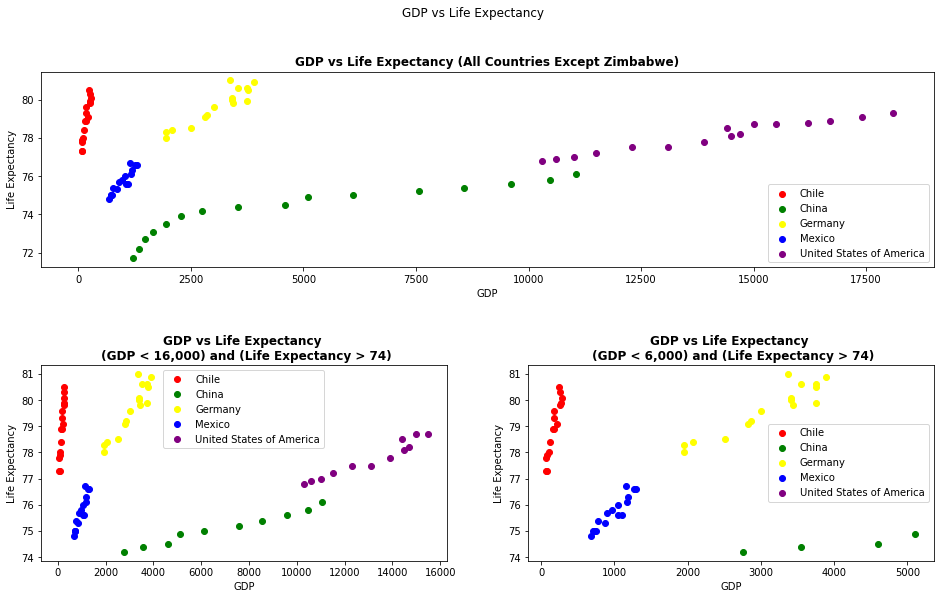

In [10]:
def Scatter_All():
    Countries = list(df.Country.unique())
    Countries.remove('Zimbabwe')
    Years = list(df.Year.unique())
    Colors = ['red','green','yellow','blue','purple','brown']
    count = 0
    df2 = df[(df['GDP (Billions)'] < 16000.0) & (df['LE'] > 74)]
    df3 = df[(df['GDP (Billions)'] < 6000.0) & (df['LE'] > 74)]
    plt.figure(figsize=(16,9))
    
    for c in Countries:
        ax1 = plt.subplot(2,1,1)
        plt.scatter(df['GDP (Billions)'][df.Country == c],df['LE'][df.Country == c],color=Colors[count],label=c)
        count+=1
    count=0
    plt.title('GDP vs Life Expectancy (All Countries Except Zimbabwe)',weight='bold')
    for c in Countries:
        ax2 = plt.subplot(2,2,3)
        plt.scatter(df2['GDP (Billions)'][df2.Country == c],df2['LE'][df2.Country == c],color=Colors[count],label=c)
        count+=1
    count=0
    plt.suptitle('GDP vs Life Expectancy')
    plt.title('GDP vs Life Expectancy \n (GDP < 16,000) and (Life Expectancy > 74)',weight='bold')
    for c in Countries:
        ax3 = plt.subplot(2,2,4)
        plt.scatter(df3['GDP (Billions)'][df3.Country == c],df3['LE'][df3.Country == c],color=Colors[count],label=c)
        count+=1
    
    plt.title('GDP vs Life Expectancy \n (GDP < 6,000) and (Life Expectancy > 74)',weight='bold')
    ax1.legend()
    ax2.legend()
    ax3.legend(loc='right')
    ax1.set_xlabel('GDP')
    ax1.set_ylabel('Life Expectancy')
    ax2.set_xlabel('GDP')
    ax2.set_ylabel('Life Expectancy')
    ax3.set_xlabel('GDP')
    ax3.set_ylabel('Life Expectancy')
    plt.subplots_adjust(hspace = 0.5)
    #plt.savefig('Scatter_All_Countries_LE_GDP.png')
    plt.show()
    plt.close()
Scatter_All()

Hmm, interesting. Well, firstly let me explain briefly what these graphs represent. The first graph shows a scatterplot of all countries except for Zimbabwe, because its Life Expectancy was so low is impacted the rest of the graph. The second graph depicts the same graph, but zoomed in to only have GDP lower than 16,000 billion and Life Expectancy greater than 74. Diagram three did the same but made it even more zoomed in to show even further detail.

So what can we see here. From the first Diagram, which includes All Countries Except Zimbabwe, you may notice that even though the US and China have considerably larger and faster growing GDPs, their Life Expectancies arent growing at such vigorous rate. As a matter of fact, you can tell that the countries with lower GDP actually seem to have a faster growth of even higher Life Expectancy than the US and China.

Furthermore, in the closer-up graphs, we can see that Chile, which has one of the lowest GDPs (Approximately 9 billion on average), has one of the fastest growing Life Expectancies, and its growth seems fairly similar to that of Germanies, even though their GDPs growth and amount are completely different.

So what does this tell us. This tells us that, although there is without a doubt a very strong positive correlation between GDP and and Life Expectancy, this does not mean that a higher GDP growth or amount will equate to considerably higher or faster growing life expectancy. In fact, it almost seems like the opposite visually in these scatter plots.

So now, the final analysis to do after all these insights, is to calculate them once and for all for their correlation:

In [11]:
def Correlation_All_Countries():
    First_Row = list(df.Country.unique())
    First_Row.insert(0,'Countries:')
    Second_Row = ['Corr:']
    avg_corr = 0
    for c in df.Country.unique():
        corr, p = pearsonr(df['LE'][df.Country == c],df['GDP (Billions)'][df.Country == c])
        Second_Row.append(str(corr))
        avg_corr += corr

    avg_corr = avg_corr/(len(Second_Row)-1)
    First_Row.append('Total Average:')
    Second_Row.append(avg_corr)
    Data = [First_Row,Second_Row]
    print(tabulate(Data, headers='firstrow',tablefmt='fancy_grid'))
Correlation_All_Countries()

╒══════════════╤══════════╤══════════╤═══════════╤══════════╤════════════════════════════╤════════════╤══════════════════╕
│ Countries:   │    Chile │    China │   Germany │   Mexico │   United States of America │   Zimbabwe │   Total Average: │
╞══════════════╪══════════╪══════════╪═══════════╪══════════╪════════════════════════════╪════════════╪══════════════════╡
│ Corr:        │ 0.949837 │ 0.908525 │  0.932695 │ 0.932254 │                   0.981709 │   0.965886 │         0.945151 │
╘══════════════╧══════════╧══════════╧═══════════╧══════════╧════════════════════════════╧════════════╧══════════════════╛


Finally, here we calculate pearsons correlation coefficient to analyze the calculated correlation between the two infamous variables in each country. Clearly, as we have most notably seen allthroughout this analysis, there is a very clear strong positive correlation between the two. Averaging a nearly 0.95 correlation to be precise! Fascinating. So, onto our Analysis Questions, what have the findings shown:
- How is the overall GDP and Life Expectancy data presented, are there outliers? If so which ones?
    - Yes! Zimbabwe had a significantly lower GDP and Life Expectancy, and the US and in some cases China had an astronomically larger GDP than the rest.

.
- On average for all countries, what is the relationship between Life Expectancy and GDP over the years? (Plotted on a Side-by-Side Bar Graph)
    - On average, all the countries seemed to increase in both GDP and Life Expectancy quite well, and seemed to have a strong relatioship 

.
- By separating each Country individualy, and plotting GDP vs Life Expectancy over time, is there a strong relationship? (One Double-Lined Chart for each Country)
    - Indeed there is, so very strong, that in cases such as Mexico for instance, a dip in GDP had an almost identical dip in Life Expectancy

.
- Does By having the highest GDP mean having the highest Life Expectancy? (Scatter Plot All Countries (GDP vs Life Expectancy)) 
    - Not necessarily. Although all countries have a very strong positive relationship, a greater GDP amount and growth such as in the case of the US and China, did not equate to significantly higher Life Expectancies or growth in Life Expectancy. Quite the opposite in fact, with other less economically developed countries growing their Life Expectancies and reaching higher Life Expectancies than the rest, such as Mexico.

    

------------------------------------------------------------------------------------------------------------------------------------------------------------
Now, onto the goal of the Analysis: Is there a relationship between GDP and Life Expectancy. According to this data, yes, there most certainly is a high positive relationship between the two. With an average correlation of 0.945. This does not mean that a much higher GDPs Nation will achieve much higher Life Expectancies more quickly, but both variables do very much so go hand in hand nevertheless.

Thank you.

